In [21]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model , load_model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow import keras
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D
from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy  as np
import pandas as pd


In [8]:
train_img_generator = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
train_generator = train_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/beertest04/train' , 
    target_size = (200, 200) , 
    batch_size  = 20 ,
    class_mode = 'categorical'
)

Found 5211 images belonging to 34 classes.


In [9]:
test_img_generator = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
test_generator = test_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/beertest04/test' , 
    target_size = (200, 200) , 
    batch_size  = 20 ,
    class_mode = 'categorical'
)

Found 224 images belonging to 34 classes.


In [10]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (200, 200, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 34) )
  img_model.add( Activation('softmax') )

  return img_model 


In [25]:
model = img_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 activation_6 (Activation)   (None, 198, 198, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 activation_7 (Activation)   (None, 97, 97, 32)        0         
                                                      

In [26]:
model.compile(optimizer = Adam(lr = 0.001), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'])



C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
cb = keras.callbacks.ModelCheckpoint('test01.h5')
es = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [28]:
model_history = model.fit(train_generator, validation_data=test_generator, epochs =25, verbose = 1 , callbacks=[cb,es])

Epoch 1/25
261/261 [==============================] - 70s 266ms/step - loss: 3.1347 - accuracy: 0.1197 - val_loss: 3.1387 - val_accuracy: 0.0714
Epoch 2/25
261/261 [==============================] - 70s 266ms/step - loss: 2.4748 - accuracy: 0.2809 - val_loss: 2.4618 - val_accuracy: 0.2902
Epoch 3/25
261/261 [==============================] - 66s 252ms/step - loss: 1.9364 - accuracy: 0.4289 - val_loss: 1.9677 - val_accuracy: 0.4107
Epoch 4/25
261/261 [==============================] - 66s 254ms/step - loss: 1.5531 - accuracy: 0.5373 - val_loss: 1.6122 - val_accuracy: 0.5134
Epoch 5/25
261/261 [==============================] - 66s 252ms/step - loss: 1.2952 - accuracy: 0.6147 - val_loss: 1.2993 - val_accuracy: 0.6473
Epoch 6/25
261/261 [==============================] - 69s 266ms/step - loss: 1.1419 - accuracy: 0.6576 - val_loss: 1.2334 - val_accuracy: 0.6652
Epoch 7/25
261/261 [==============================] - 67s 256ms/step - loss: 1.0016 - accuracy: 0.7062 - val_loss: 1.2709 - val_ac

In [29]:
print('모델 저장')
model.save('case_orinal01.h5')

모델 저장


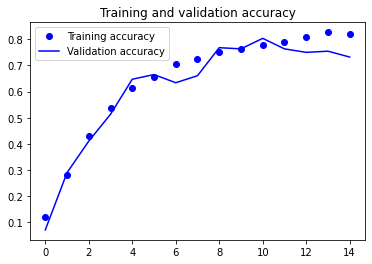

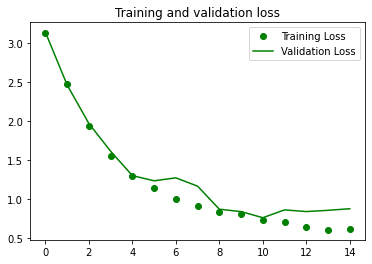

In [31]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with open('C://Users//crid2//beer_test_tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
train_generator.class_indices

In [ ]:
img_src = 'c://users/crid2/downloads/test/30.jpg'
test_img = image.load_img(img_src, target_size=(200, 200))
x = image.img_to_array(test_img)
x = np.expand_dims(x, axis = 0)
image_ = np.vstack([x])
classes = model.predict(image_, batch_size = 10)
print('pred - ', classes[0])
np.argmax(classes[0])
